<a href="https://colab.research.google.com/github/phan-le-phu/CS114.K21/blob/master/practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Load libraries

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score


In [0]:
# Load dataset
url = "https://cs.uit.edu.vn/data.txt"
names = ['sizes', 'times']
dataset = pd.read_csv(url, names=names)

In [30]:
# shape
print(dataset.shape)

(5211, 2)


In [31]:
# head
print(dataset.head(20))

      sizes     times
0   4032139  1.200580
1   2055486  0.509774
2   5626651  1.476080
3     42065  0.007651
4   6297788  1.661560
5   8871407  2.653120
6   3106899  0.801168
7   2410855  0.598170
8    558704  0.129056
9   9012730  2.477870
10  6099403  1.631770
11  7189925  1.940180
12  3759151  0.978011
13  8004274  2.202210
14  4125525  1.059360
15  7580493  2.084130
16  9045670  2.461290
17  2987773  0.768997
18  2956967  0.780160
19  1941281  0.477229


In [32]:
# descriptions
print(dataset.describe())

              sizes        times
count  5.211000e+03  5211.000000
mean   4.991583e+06     1.363322
std    2.903517e+06     0.825849
min    2.390000e+02     0.000028
25%    2.451362e+06     0.630964
50%    5.032102e+06     1.355770
75%    7.523041e+06     2.076820
max    9.995358e+06     3.315540


In [33]:
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5211 entries, 0 to 5210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sizes   5211 non-null   int64  
 1   times   5211 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 81.5 KB
None


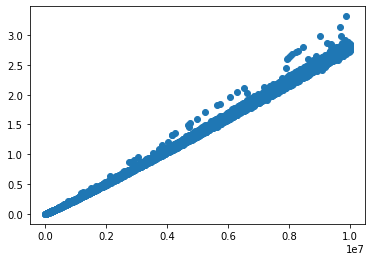

In [34]:
plt.scatter(dataset["sizes"],dataset["times"])
plt.show()


In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset["sizes"], dataset["times"], test_size = 0.2)

In [0]:
my_model =  linear_model.LinearRegression()

In [37]:
X_train = X_train.values.reshape(-1, 1)
Y_train = Y_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
Y_test = Y_test.values.reshape(-1, 1)
my_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
dataset_Y_pred = my_model.predict(X_test)

In [39]:
# The coefficients
print('Coefficients: \n', my_model.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(Y_test, dataset_Y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(Y_test, dataset_Y_pred))

Coefficients: 
 [[2.84176377e-07]]
Mean squared error: 0.00
Coefficient of determination: 1.00


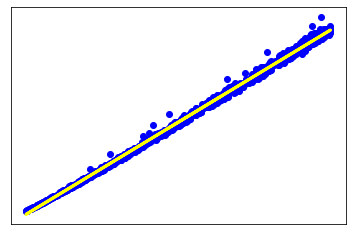

In [40]:
plt.scatter(X_test, Y_test,  color='blue')
plt.plot(X_test, dataset_Y_pred, color='yellow', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()